# Stroke Prediction and EDA

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore Data](#process)
* [<span style="color:#A690A4"> 3. Predict Asking Price](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

## General Approach

Here are some recommended models and methodologies based on typical approaches for predictive modeling in healthcare.

### 1. Supervised Learning Models
The task is likely binary classification (predicting the presence or absence of stroke), so the following models are suitable:

#### Traditional Machine Learning Models
- **Logistic Regression**: For interpretability and simplicity. Effective if relationships between predictors and the target are linear.
- **Random Forest**: For handling non-linear relationships and feature importance analysis.
- **Gradient Boosting** (e.g., XGBoost, LightGBM, CatBoost): For high-performance predictions and handling imbalanced datasets.
- **Support Vector Machines (SVMs)**: Effective for small to medium datasets with a clear margin of separation.

#### Neural Networks
- **Multi-Layer Perceptrons (MLPs)**: If the dataset is large and relationships are complex.
- **Deep Learning Architecture**s: Useful for extensive feature engineering or large-scale data.

### 2. Handling Imbalanced Data
Stroke datasets are often imbalanced (stroke events are relatively rare). To address this:

- Use resampling techniques (e.g., SMOTE for oversampling, undersampling).
- Leverage class weights in algorithms like logistic regression or gradient boosting.

### 3. Exploratory and Feature Selection Techniques
Before modeling, consider:

- Feature engineering and selection: Use methods like mutual information, recursive feature elimination (RFE), or Lasso regression to identify important predictors.
- PCA (Principal Component Analysis): If dimensionality reduction is necessary.

### 4. Evaluation Metrics
Since stroke prediction is a high-stakes task, consider:

- **ROC-AUC**: For overall model performance.
- **Precision, Recall, and F1-Score**: To balance sensitivity and specificity.
- **Confusion Matrix**: For detailed error analysis.

## The Features

The dataset contains 12 columns with a mix of numerical and categorical data, and it has some missing values in the bmi column. Here's a summary of key features:

### Key Features:
**Demographics**:
1. gender (categorical): Male, Female, or possibly others.
2. age (numerical): Continuous; spans from 0.08 to 82.

**Health Metrics:**
1. hypertension (binary): 0 (no), 1 (yes).
2. heart_disease (binary): 0 (no), 1 (yes).
3. avg_glucose_level (numerical): Continuous; ranges from 55.12 to 271.74.
4. bmi (numerical): Continuous; has missing values.

**Lifestyle and Social Factors:**
1. ever_married (categorical): Yes or No.
2. work_type (categorical): Includes the categories "children", "Govt_jov", "Never_worked", "Private" and "Self-employed".
3. Residence_type (categorical): Urban or Rural.
4. smoking_status (categorical): Includes "formerly smoked," "never smoked," "smokes," and possibly unknown.

**Target Variable:**
- stroke (binary): 0 (no stroke) or 1 (stroke).

# <span style="color:#5E6997">Collect, Wrangle, and Explore Data</span> <a class="anchor" id="process"></a>

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Find the Categorical Variables and the Range of Unique Values

In [4]:
categorical_columns = df[['gender','ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'hypertension', 'heart_disease']]

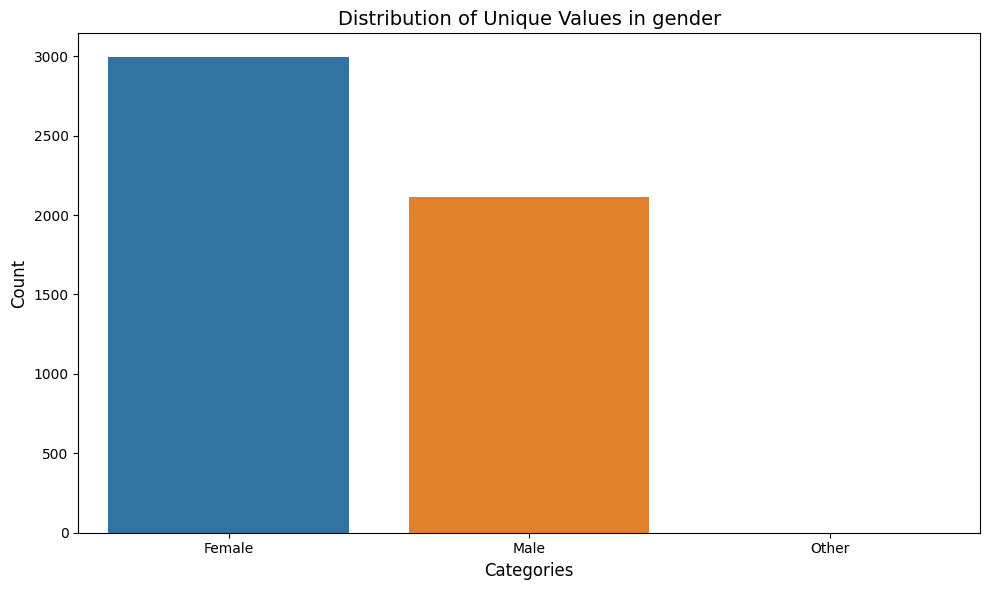

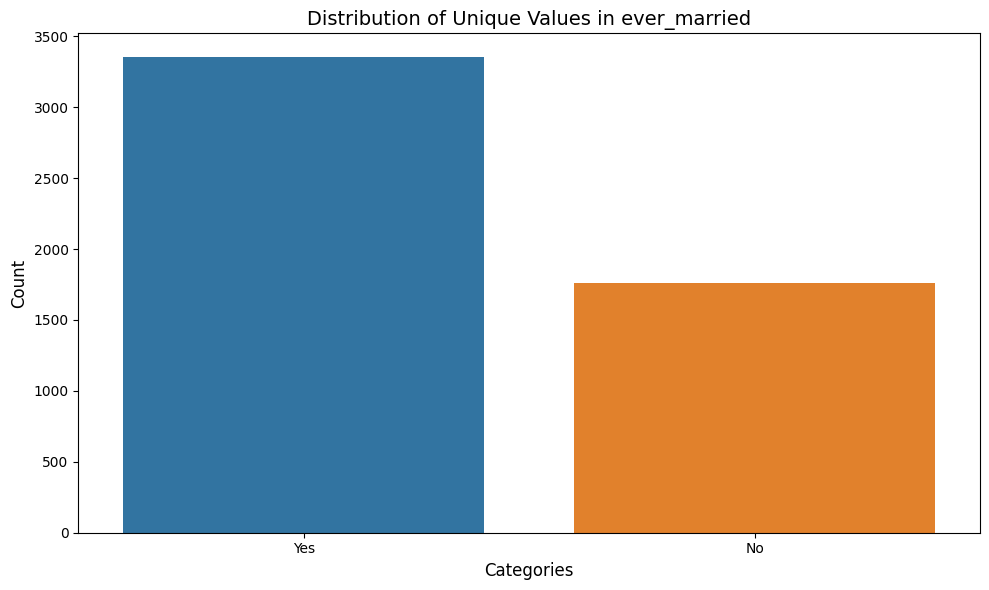

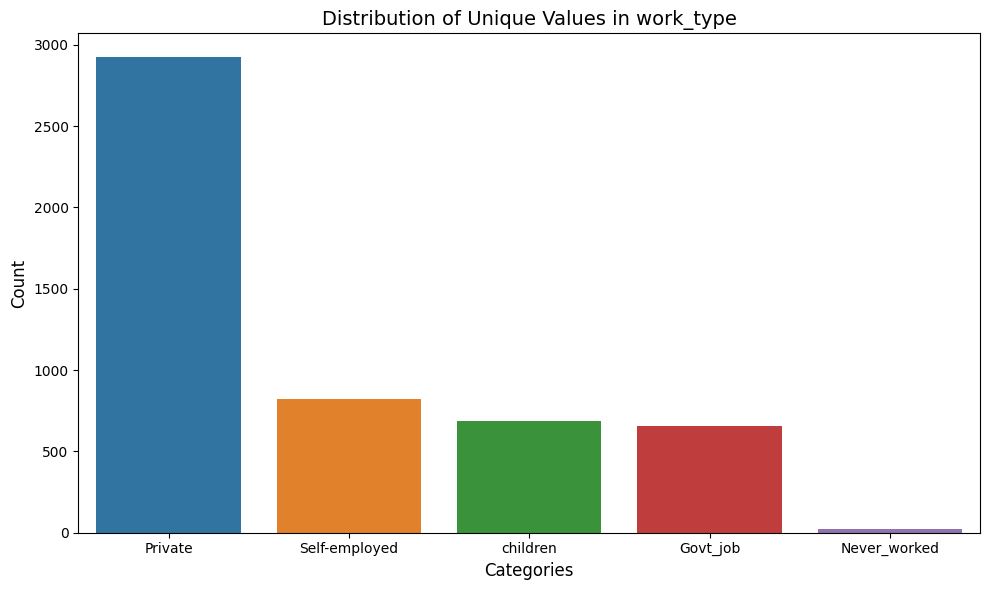

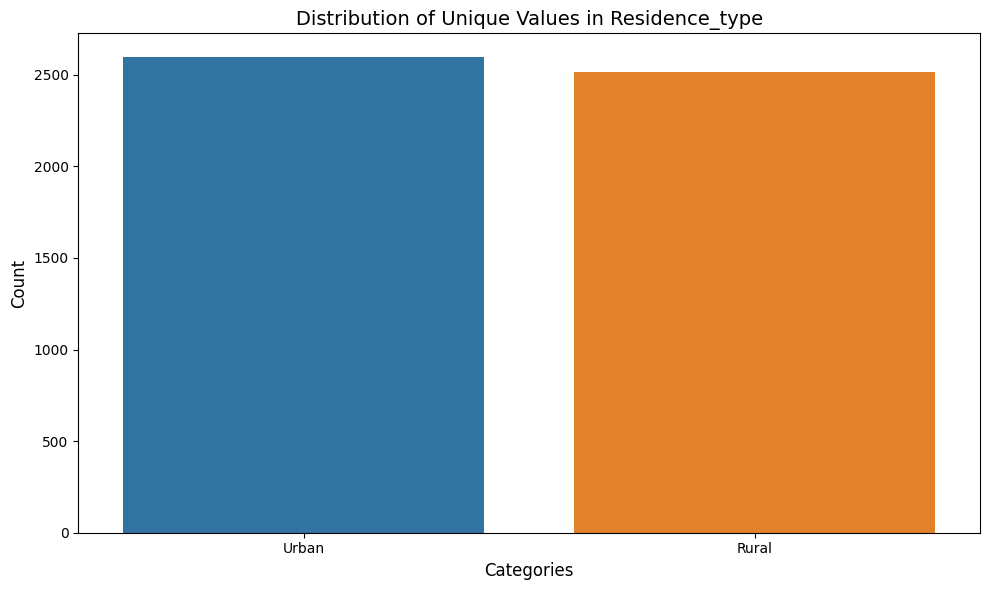

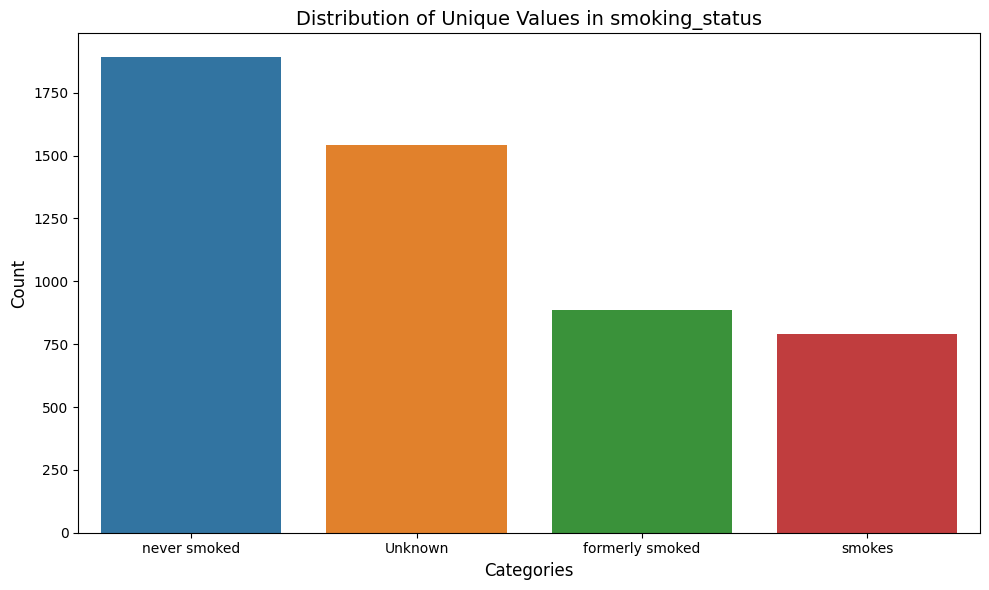

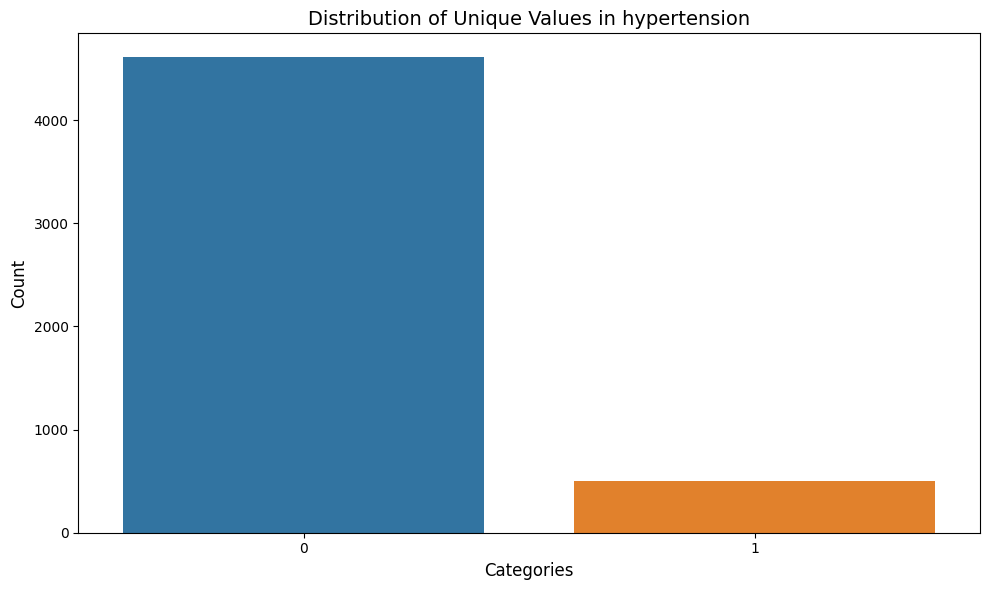

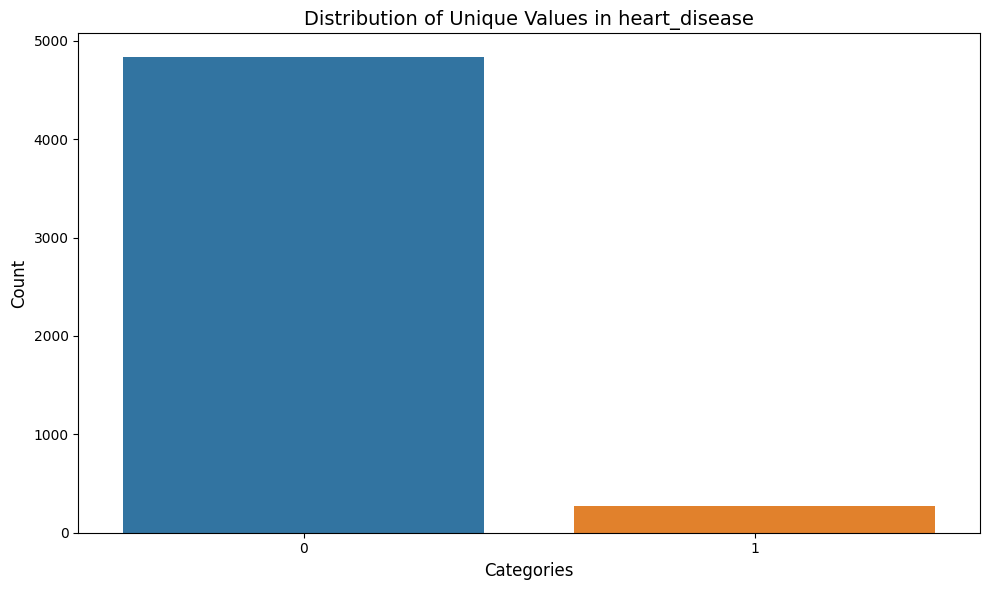

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of unique values for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of Unique Values in {column}', fontsize=14)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

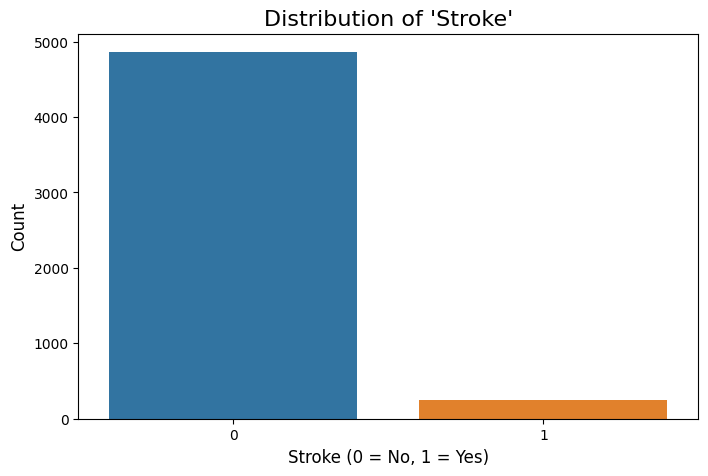

In [6]:
# Plot the distribution of 'stroke'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='stroke')
plt.title("Distribution of 'Stroke'", fontsize=16)
plt.xlabel("Stroke (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


## Numerical Feature Distribution

In [7]:
numerical_columns = df.drop(columns=categorical_columns.columns.tolist() + ['stroke'] + ['id'])

In [8]:
numerical_columns

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


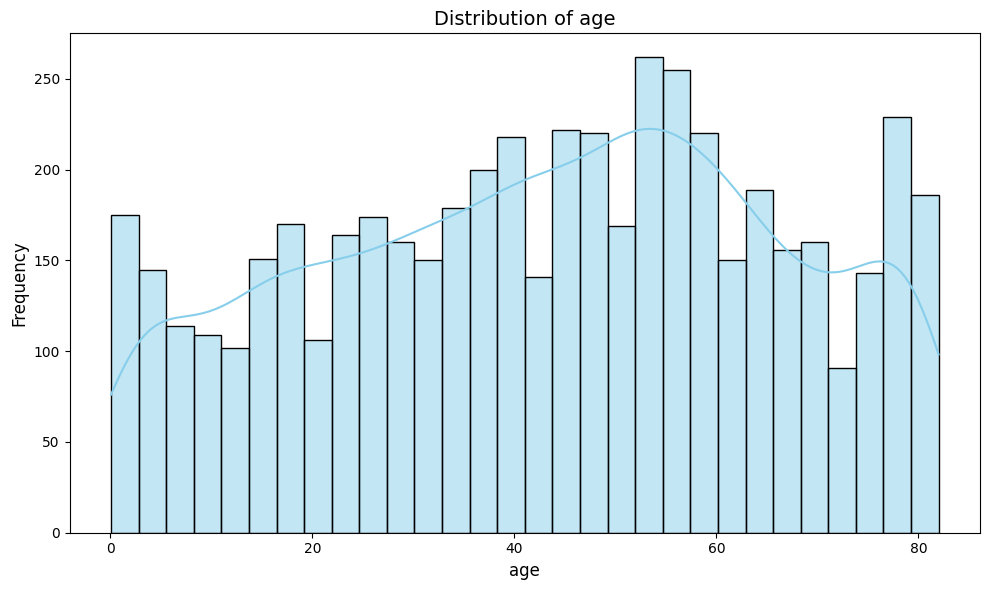

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


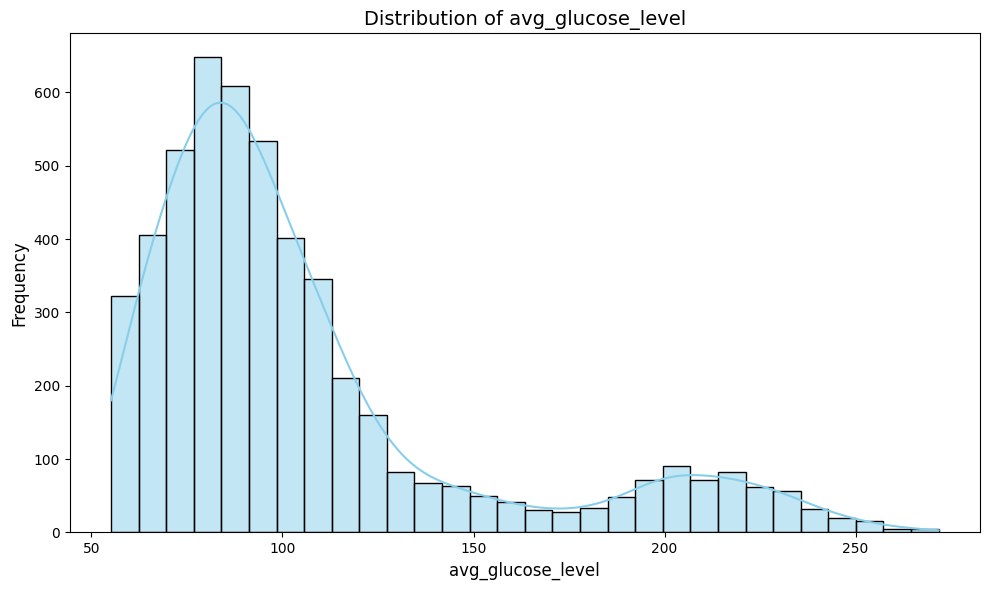

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


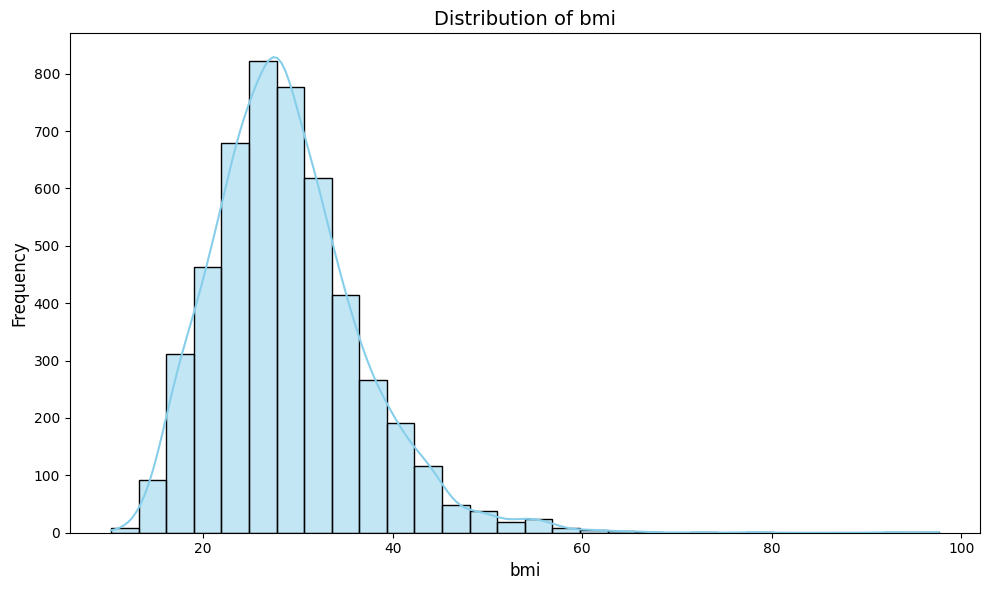

In [9]:
# Plot the distribution of each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


# <span style="color:#5E6997">Predict Strokes</span> <a class="anchor" id="predict"></a>

# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>